## Loading libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

Import dataframe

In [4]:
data = pd.read_csv("songs_df_final.csv")

In [5]:
data

,song,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,song_label
0,Super Freaky Girl,Nicki Minaj,0.950,0.891,-2.653,0.2410,0.06450,0.000018,0.3090,0.912,133.010,4C6Uex2ILwJi9sZXRdmqXp,170977,H
1,As It Was,Harry Styles,0.520,0.731,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,4LRPiXqCikLlN15c3yImP7,167303,H
2,About Damn Time,Lizzo,0.836,0.743,-6.305,0.0656,0.09950,0.000000,0.3350,0.722,108.966,1PckUlxKqWQs3RlWXVBLw3,191822,H
3,Break My Soul,Beyonce,0.687,0.887,-5.040,0.0826,0.05750,0.000002,0.2700,0.853,114.941,2KukL7UlQ8TdvpaA7bY3ZJ,278282,H
4,Running Up That Hill (A Deal With God),Kate Bush,0.625,0.533,-11.903,0.0596,0.65900,0.002660,0.0546,0.139,108.296,29d0nY7TzCoi22XBqDQkiP,300840,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,You And Me Jesus,Jake Hess,0.725,0.183,-20.140,0.0428,0.81800,0.000000,0.1090,0.510,116.026,758hjU9V1HnECTxhqgCbVJ,204000,R
2310,I Knew I Loved You,Savage Garden,0.610,0.497,-9.880,0.0279,0.32000,0.000061,0.0884,0.739,85.031,6nozDLxeL0TE4MS9GqYU1v,250360,R
2311,Your Mother Should Have Told You,Robert Palmer,0.474,0.965,-8.327,0.0493,0.03850,0.002880,0.1710,0.544,159.875,2CqXrDR4wIr2K4rh4LfbA6,221427,R
2312,Where Is Everybody?,Nine Inch Nails,0.625,0.767,-5.753,0.0477,0.00166,0.000789,0.0900,0.792,144.013,3igeWkfoyimX5hfD3DbpER,340200,R


We drop the categorical columns

In [15]:
data1 = data.drop(["song", "artist","id", "song_label"], axis = 1)
data1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.950,0.891,-2.653,0.2410,0.06450,0.000018,0.3090,0.912,133.010,170977
1,0.520,0.731,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,167303
2,0.836,0.743,-6.305,0.0656,0.09950,0.000000,0.3350,0.722,108.966,191822
3,0.687,0.887,-5.040,0.0826,0.05750,0.000002,0.2700,0.853,114.941,278282
4,0.625,0.533,-11.903,0.0596,0.65900,0.002660,0.0546,0.139,108.296,300840
...,...,...,...,...,...,...,...,...,...,...
2309,0.725,0.183,-20.140,0.0428,0.81800,0.000000,0.1090,0.510,116.026,204000
2310,0.610,0.497,-9.880,0.0279,0.32000,0.000061,0.0884,0.739,85.031,250360
2311,0.474,0.965,-8.327,0.0493,0.03850,0.002880,0.1710,0.544,159.875,221427
2312,0.625,0.767,-5.753,0.0477,0.00166,0.000789,0.0900,0.792,144.013,340200


In [16]:
X = data1.to_numpy()
X

array([[ 9.50000e-01,  8.91000e-01, -2.65300e+00, ...,  9.12000e-01,
         1.33010e+02,  1.70977e+05],
       [ 5.20000e-01,  7.31000e-01, -5.33800e+00, ...,  6.62000e-01,
         1.73930e+02,  1.67303e+05],
       [ 8.36000e-01,  7.43000e-01, -6.30500e+00, ...,  7.22000e-01,
         1.08966e+02,  1.91822e+05],
       ...,
       [ 4.74000e-01,  9.65000e-01, -8.32700e+00, ...,  5.44000e-01,
         1.59875e+02,  2.21427e+05],
       [ 6.25000e-01,  7.67000e-01, -5.75300e+00, ...,  7.92000e-01,
         1.44013e+02,  3.40200e+05],
       [ 8.10000e-01,  3.86000e-01, -7.84600e+00, ...,  5.06000e-01,
         1.57919e+02,  2.35387e+05]])

## First model
creation fo an instance of DBSCAN and train the model.

In [114]:
model = DBSCAN(eps=0.4, min_samples=2)
# fit model and predict clusters
model.fit(X)
bdscan_04_2 = model.fit_predict(X)


In [115]:
bdscan_04_2

array([-1, -1, -1, ..., -1, -1, -1])

In [119]:
data1["bdscan_04_2"] = bdscan_04_2
data1["bdscan_04_2"].value_counts()

-1    2308
 0       2
 1       2
 2       2
Name: bdscan_04_2, dtype: int64

Now we collect the unique cluster predictions

In [112]:
# retrieve unique clusters
clusters = np.unique(yhat)
clusters # DBSCAN flags with "-1" noisy data.

array([-1,  0,  1,  2])

Finally we visuallize the results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


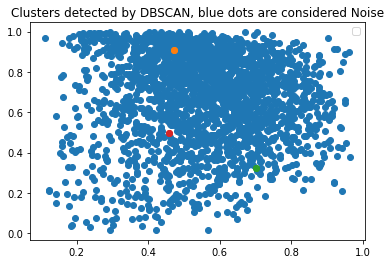

In [59]:
%matplotlib inline
#X_df['clusters'] = clusters
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	#X_df[X_df['clusters'] == cluster]
	# create scatter of these samples    
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
	# plt.scatter(X_df.iloc[row_ix,0],X_df.iloc[row_ix,1])

# show the plot
plt.title("Clusters detected by DBSCAN, blue dots are considered Noise")
plt.legend()
plt.show()

## Fine tunning

In [ ]:
In order to find out the best value for  𝜖 , we follow these steps:

Compute the distance matrix between the all the observations
We fix the number of nearest neighbours k > 2.
We get all the distances from each point to it's k-nearest-neighbourgh.
We sort all those distances in descending order.
We plot those distances.

### Step 1

In [61]:
d = distance_matrix(X,X)
print(d)
print()

[[     0.           3674.22890413  20845.01418936 ...  50450.00747618
  169223.00038677  64410.00502962]
 [  3674.22890413      0.          24519.08608451 ...  54124.00190913
  172897.00258938  68084.00193191]
 [ 20845.01418936  24519.08608451      0.         ...  29605.04384489
  148378.0041405   43565.02753431]
 ...
 [ 50450.00747618  54124.00190913  29605.04384489 ...      0.
  118773.00108762  13960.00016408]
 [169223.00038677 172897.00258938 148378.0041405  ... 118773.00108762
       0.         104813.00094497]
 [ 64410.00502962  68084.00193191  43565.02753431 ...  13960.00016408
  104813.00094497      0.        ]]



### Step 2

We need to sort this matrix by row and to ignore the first element as it is the distance to every point to itself (ie. 0)

In [64]:
d2 = np.sort(d)[:,1:]
print(d2)

[[3.26362987e+01 4.83732876e+01 5.15040476e+01 ... 8.30796001e+05
  8.87916000e+05 1.56015900e+06]
 [9.70533488e+01 9.97130106e+01 1.03707312e+02 ... 8.34470000e+05
  8.91590002e+05 1.56383300e+06]
 [3.23127410e+01 6.39095004e+01 6.40567553e+01 ... 8.09951002e+05
  8.67071000e+05 1.53931400e+06]
 ...
 [2.89849860e+01 4.59858816e+01 6.17086714e+01 ... 7.80346000e+05
  8.37466001e+05 1.50970900e+06]
 [3.33037208e+02 4.97540666e+02 7.20403691e+02 ... 6.61573000e+05
  7.18693001e+05 1.39093600e+06]
 [8.14397237e+01 1.68342741e+02 2.40023130e+02 ... 7.66386000e+05
  8.23506001e+05 1.49574900e+06]]


### Step 3

We select the k-th column, for example k = 3 (ie. the distance from each point to it's 4-th nearest neighbourgh.

In [72]:
f = d2[:,3]
print(f) # The distances between every point and it's 4th nearest neighbour.

[110.78886435 133.28013361 102.02898568 ...  62.05340412 960.49771325
 240.9740817 ]


### Step 4

We sort the 3-th distances in descending order.

In [67]:
f_final = np.sort(f)[::-1]
print()
print(f_final)


[1.06104300e+06 3.90986003e+05 3.33866014e+05 ... 2.79012491e+01
 2.75585093e+01 2.63228329e+01]


### Step 5

We plot those distances.

/var/folders/_k/1xyh1kms5gg3dls55pm6gkwr0000gn/T/ipykernel_77284/357253075.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


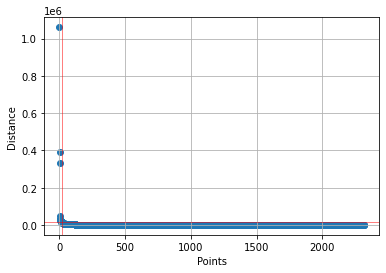

In [68]:
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Points")
plt.ylabel("Distance")
# Current selected settings for DBSCAN
xnew = 20
ynew = f_final[20]
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid(b=True)
plt.show()

In [73]:
f_final[8]

24327.00070394116

In [74]:
f_final[20]

13406.004280210822